In [17]:
from typing import Dict, List, Union
import kagglehub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import shutil

In [92]:
# Constants
BASE_PATH = os.path.join("D:\\", "Workspaces", "vscode-workspace", "ai_x_medicine", "data")
GDP_DATASET_FILENAME = "GDP.csv"
GINI_DATASET_FILENAME = "gini-coefficient-by-country-2025.csv"

RES_GDP_PATH = os.path.join(BASE_PATH, "out", "res-gdp.csv")
RES_GINI_PATH = os.path.join(BASE_PATH, "out", "res-gini.csv")
OUTPUT_PATH = os.path.join(BASE_PATH, "out", "socioeconomic-pain.csv")

In [122]:
# Util functions
def is_valid_data(val):
    if pd.notnull(val) and str(val).strip() != '':
        return True
    return False

def compute_pain(gdp_val: float, gini_val: float) -> float:
    if gini_val is None:
        return gdp_val
    else:
        return gini_val

def bar_plot(dataframe: pd.DataFrame):
    plt.figure(figsize=(12, 6))
    dataframe.plot(kind='bar')
    plt.xlabel('Countries')
    plt.ylabel('values')
    # plt.title('')
    plt.tight_layout()
    plt.show()

In [ ]:
# Download data
if not os.path.exists(os.path.join(BASE_PATH, GDP_DATASET_FILENAME)):
    path = kagglehub.dataset_download("annafabris/world-gdp-by-country-1960-2022")
    shutil.move(path, BASE_PATH)

In [ ]:
actual_gdp_path = os.path.join(BASE_PATH, "2", GDP_DATASET_FILENAME)    # the 2 is probably for some weird api download reason
gdp_df = pd.read_csv(actual_gdp_path)

In [ ]:
FIRST_GDP_COLUMN = 3
results: List[Dict[str, Union[str, int, int]]] = []
for idx, row in gdp_df.iterrows():
    country = row["Country"]
    data_point = None
    for col in gdp_df.columns[FIRST_GDP_COLUMN:]:
        val = row[col]
        # Check for non-empty and non-NaN
        if pd.notnull(val) and str(val).strip() != '':
            data_point = {
                'Country': country,
                'First Year': int(col),
                'First Value': int(val)
            }
            break
    if data_point is None:
        print(f"{country} has no GDP data")
        results.append({ 'Country': country, 'First Year': -1, 'First Value': -1 })
    else:
        print(f"{country} with first data at {data_point['First Year']}")
        results.append(data_point)


Aruba with first data at 1986
Africa Eastern and Southern with first data at 1961
Afghanistan with first data at 1961
Africa Western and Central with first data at 1961
Angola with first data at 1980
Albania with first data at 1984
Andorra with first data at 1970
Arab World with first data at 1968
United Arab Emirates with first data at 1975
Argentina with first data at 1962
Armenia with first data at 1990
American Samoa with first data at 2002
Antigua and Barbuda with first data at 1977
Australia with first data at 1961
Austria with first data at 1961
Azerbaijan with first data at 1990
Burundi with first data at 1961
Belgium with first data at 1961
Benin with first data at 1961
Burkina Faso with first data at 1961
Bangladesh with first data at 1961
Bulgaria with first data at 1980
Bahrain with first data at 1980
Bahamas, The with first data at 1961
Bosnia and Herzegovina with first data at 1994
Belarus with first data at 1990
Belize with first data at 1961
Bermuda with first data at 1

First Year
-1         4
 1961    134
 1962      2
 1965     12
 1966      3
 1967      3
 1968      4
 1970     13
 1971      1
 1974      1
 1975      3
 1976      1
 1977      3
 1979      1
 1980     12
 1981      3
 1982      2
 1983      1
 1984      2
 1985      2
 1986      2
 1987      3
 1988      5
 1990     16
 1991      2
 1992      1
 1994      2
 1995      8
 1998      2
 1999      1
 2000      4
 2001      2
 2002      4
 2006      1
 2008      2
 2010      1
 2011      3
Name: count, dtype: int64


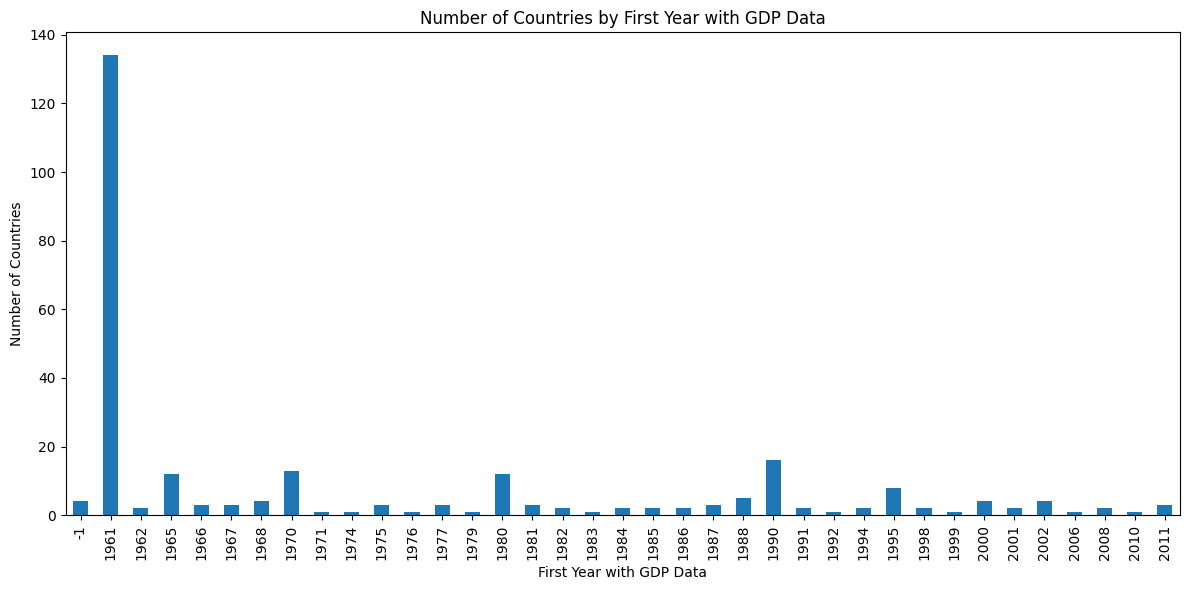

In [43]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Count occurrences of each 'First Year'
year_counts = results_df['First Year'].value_counts().sort_index()
print(year_counts)

# Plot
plt.figure(figsize=(12, 6))
year_counts.plot(kind='bar')
plt.xlabel('First Year with GDP Data')
plt.ylabel('Number of Countries')
plt.title('Number of Countries by First Year with GDP Data')
plt.tight_layout()
plt.show()

In [51]:
FIRST_GDP_COLUMN = 3
my_year_counts: Dict[int, int] = {}
for idx, row in gdp_df.iterrows():
    country = row["Country"]
    data_point = None
    for col in gdp_df.columns[FIRST_GDP_COLUMN:]:
        val = row[col]
        # Check for non-empty and non-NaN
        if pd.notnull(val) and str(val).strip() != '':
            if col not in my_year_counts:
                my_year_counts[col] = 0
            my_year_counts[col] += 1


In [55]:
print(my_year_counts)

{'1986': 201, '1987': 205, '1988': 210, '1989': 210, '1990': 226, '1991': 226, '1992': 227, '1993': 229, '1994': 231, '1995': 240, '1996': 240, '1997': 240, '1998': 242, '1999': 243, '2000': 247, '2001': 249, '2002': 254, '2003': 254, '2004': 254, '2005': 254, '2006': 255, '2007': 255, '2008': 256, '2009': 256, '2010': 257, '2011': 260, '2012': 258, '2013': 259, '2014': 260, '2015': 258, '2016': 258, '2017': 258, '2018': 258, '2019': 257, '2020': 257, '2021': 251, '1961': 134, '1962': 136, '1963': 136, '1964': 136, '1965': 147, '1966': 150, '1967': 153, '1968': 158, '1969': 158, '1970': 167, '1971': 170, '1972': 170, '1973': 170, '1974': 171, '1975': 173, '1976': 174, '1977': 177, '1978': 176, '1979': 177, '1980': 191, '1981': 194, '1982': 195, '1983': 196, '1984': 197, '1985': 199, '2022': 233}


# ############################################################################################

In [ ]:
# [x] GDP: extract latest values by country and save it as csv
FIRST_GDP_COLUMN = 3
actual_gdp_path = os.path.join(BASE_PATH, "2", GDP_DATASET_FILENAME)    # the 2 is probably for some weird api download reason
gdp_df = pd.read_csv(actual_gdp_path)
gdp_results: List[Dict[str, Union[str, int, int]]] = []
for _, row in gdp_df.iterrows():
    country = row["Country"]
    data_point = None
    for idx in range(len(gdp_df.columns)-1, FIRST_GDP_COLUMN-1, -1):
        col = gdp_df.columns[idx]
        val = row[col]
        # Check for non-empty and non-NaN
        if pd.notnull(val) and str(val).strip() != '':
            data_point = {
                'Country': country,
                'Last Year': int(col),
                'Last Value': int(val)
            }
            break
    if data_point is None:
        print(f"{country} has no GDP data")
    else:
        print(f"{country} with last data at {data_point['Last Year']}")
        gdp_results.append(data_point)
res_gdp_df = pd.DataFrame(gdp_results)
res_gdp_df.to_csv(RES_GDP_PATH, index=False)


Aruba with last data at 2021
Africa Eastern and Southern with last data at 2022
Afghanistan with last data at 2021
Africa Western and Central with last data at 2022
Angola with last data at 2022
Albania with last data at 2022
Andorra with last data at 2022
Arab World with last data at 2022
United Arab Emirates with last data at 2022
Argentina with last data at 2022
Armenia with last data at 2022
American Samoa with last data at 2021
Antigua and Barbuda with last data at 2022
Australia with last data at 2022
Austria with last data at 2022
Azerbaijan with last data at 2022
Burundi with last data at 2022
Belgium with last data at 2022
Benin with last data at 2022
Burkina Faso with last data at 2022
Bangladesh with last data at 2022
Bulgaria with last data at 2022
Bahrain with last data at 2022
Bahamas, The with last data at 2022
Bosnia and Herzegovina with last data at 2022
Belarus with last data at 2022
Belize with last data at 2022
Bermuda with last data at 2022
Bolivia with last data a

In [118]:
# transform GDP data to [0, 1]
# description: relative logarithm of how often a countries GDP fits into the richest country's GDP
def transform_gdp(gdp_df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    gdp_df = gdp_df.copy(deep=True)
    max_gdp, min_gdp = gdp_df['Last Value'].max(), gdp_df['Last Value'].min()
    if verbose:
        print(f"Max value at {gdp_df[gdp_df['Last Value'] >= max_gdp]}")
    
    max_log_value = np.log(max_gdp / min_gdp)
    gdp_df['Last Value'] = gdp_df['Last Value'].apply(lambda x: np.log(max_gdp / x) / max_log_value)
    if verbose: 
        print(gdp_df)
    return gdp_df


In [110]:
# transform GINI data to [0, 1]
# description: just divide by 100 as it is already in percent
def transform_gini(gini_df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    #gini_df = pd.read_csv(os.path.join(BASE_PATH, GINI_DATASET_FILENAME))
    gini_transformed = []
    for _, row in gini_df.iterrows():
        country = row["country"]
        dp1 = row["GiniCoefficient_GiniCoefficientViaWorldBank_gini_2024update"]
        dp2 = row["GiniCoefficient_GiniCoefficientViaCIA_gini_2024update"]
        if is_valid_data(dp1) and is_valid_data(dp2):
            gini_transformed.append({
                "Country": country,
                "gini": np.mean([dp1, dp2]) / 100
            })
        elif is_valid_data(dp1):
            gini_transformed.append({
                "Country": country,
                "gini": dp1 / 100
            })
        elif is_valid_data(dp2):
            gini_transformed.append({
                "Country": country,
                "gini": dp2 / 100
            })
    return pd.DataFrame(gini_transformed)

In [120]:
# pain data
gdp_df = transform_gdp(pd.read_csv(RES_GDP_PATH, index_col=False))
gini_df = pd.read_csv(RES_GINI_PATH, index_col=False)

# gdp, gini index, pain killers?, 
socioeconomic_results: List[Dict[str, Union[str, float]]] = []
for country in gdp_df.Country:
    # consider gdp value
    row = gdp_df.loc[gdp_df.Country == country]
    gdp_val = row['Last Value'].values[0]
    
    # consider gini value
    row = gini_df.loc[gini_df.Country == country]
    if row.empty:
        gini_val = None
    else:
        gini_val = row['gini'].values[0]

    # calculate and store pain value
    pain_val = compute_pain(gdp_val, gini_val)
    socioeconomic_results.append({ "Country": country, "pain": pain_val })

socioeconomic_df = pd.DataFrame(socioeconomic_results)
socioeconomic_df.to_csv(OUTPUT_PATH, index=False)

<Figure size 1200x600 with 0 Axes>

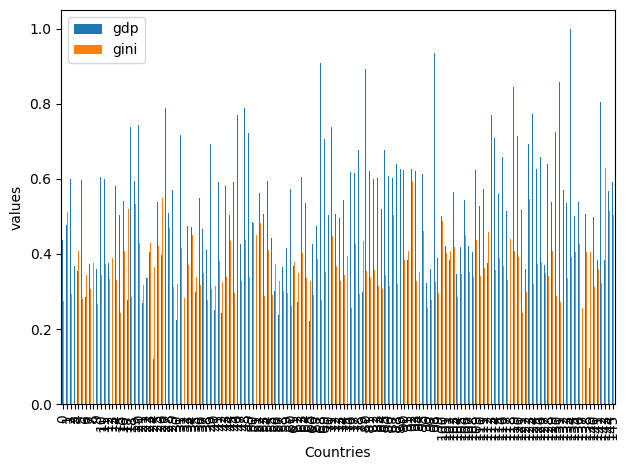

In [152]:
# Compare gini and pdg pain
df_gdp = transform_gdp(pd.read_csv(RES_GDP_PATH, index_col=False))
df_gini = pd.read_csv(RES_GINI_PATH, index_col=False)

comp_results: List[Dict[str, Union[str, float]]] = []
for country in df_gdp.Country:
    # consider gdp value
    row = df_gdp.loc[df_gdp.Country == country]
    gdp_val = row['Last Value'].values[0]
    
    # consider gini value
    row = df_gini.loc[df_gini.Country == country]
    if row.empty:
        gini_val = None
    else:
        gini_val = row['gini'].values[0]
        comp_results.append({ "Country": country, "gdp": gdp_val, "gini": gini_val })

df_comp = pd.DataFrame(comp_results)
bar_plot(df_comp)

In [153]:
# Find intersection of country/location names
common_data = set(df_gdp["Country"]).intersection(set(df_gini["Country"]))
print(common_data)

# Subset both DataFrames to only those in the intersection
df_gini_sub = df_gini[df_gini["Country"].isin(common_data)].copy()
df_gdp_sub = df_gdp[df_gdp["Country"].isin(common_data)].copy()

{'Nauru', 'Sierra Leone', 'Switzerland', 'Niger', 'Spain', 'Sudan', 'United Kingdom', 'Marshall Islands', 'Serbia', 'Greenland', 'Philippines', 'Gabon', 'Sri Lanka', 'Timor-Leste', 'Vanuatu', 'Grenada', 'Norway', 'Chile', 'Solomon Islands', 'El Salvador', 'Liberia', 'Kiribati', 'Italy', 'Benin', 'Burundi', 'Brazil', 'Georgia', 'Lithuania', 'Mexico', 'Trinidad and Tobago', 'Algeria', 'Vietnam', 'Nicaragua', 'Uzbekistan', 'Bulgaria', 'South Sudan', 'Ethiopia', 'Belarus', 'Rwanda', 'Malawi', 'Malaysia', 'Peru', 'Maldives', 'Mauritania', 'Estonia', 'South Africa', 'Ecuador', 'Turkmenistan', 'Zambia', 'Portugal', 'Guinea-Bissau', 'Qatar', 'Tunisia', 'Mozambique', 'Romania', 'Slovenia', 'Madagascar', 'Djibouti', 'Burkina Faso', 'Tanzania', 'Dominican Republic', 'Albania', 'Morocco', 'France', 'Canada', 'Pakistan', 'Mongolia', 'Cyprus', 'India', 'Myanmar', 'Latvia', 'Seychelles', 'Comoros', 'Iraq', 'Guyana', 'Somalia', 'Thailand', 'Central African Republic', 'Uganda', 'Ukraine', 'Senegal', 'P

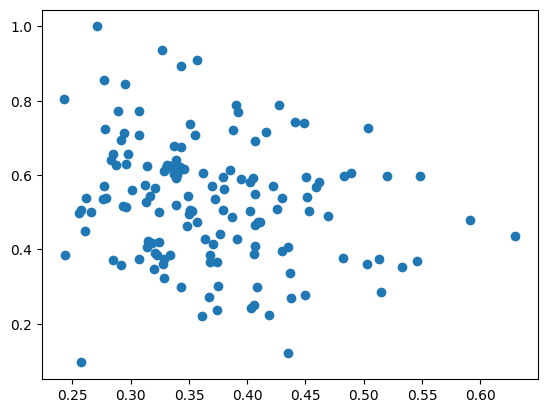

In [154]:
# Correlation between GINI and GDP (adapted)
plt.scatter(df_gini_sub.gini, df_gdp_sub['Last Value'])
plt.show()

In [143]:
DISEASE_DATASET_PATH = os.path.join(BASE_PATH, "painful_disease_prevalence_vs_environment.csv")
df_diseases = pd.read_csv(DISEASE_DATASET_PATH)

df_gdp = pd.read_csv(RES_GDP_PATH, index_col=False)
df_gini = pd.read_csv(RES_GINI_PATH, index_col=False)

#print(df_diseases)

# Find intersection of country/location names
common_gdp = set(df_diseases["location"]).intersection(set(df_gdp["Country"]))
common_gini = set(df_diseases["location"]).intersection(set(df_gini["Country"]))

# Subset both DataFrames to only those in the intersection
df_diseases_gdp_sub = df_diseases[df_diseases["location"].isin(common_gdp)].copy()
df_gdp_sub = df_gdp[df_gdp["Country"].isin(common_gdp)].copy()
df_diseases_gini_sub = df_diseases[df_diseases["location"].isin(common_gini)].copy()
df_gini_sub = df_gini[df_gini["Country"].isin(common_gini)].copy()

print(f"common_gdp.size = {len(common_gdp)}")
print(f"df_gdp_sub.size = {df_gdp_sub.size}")
print(f"df_diseases_gdp_sub.size = {df_diseases_gdp_sub.size}")
print()
print(f"common_gini.size = {len(common_gini)}")
print(f"df_gini_sub.size = {df_gini_sub.size}")
print(f"df_diseases_gini_sub.size = {df_diseases_gini_sub.size}")


common_gdp.size = 66
df_gdp_sub.size = 198
df_diseases_gdp_sub.size = 1188

common_gini.size = 58
df_gini_sub.size = 116
df_diseases_gini_sub.size = 1044


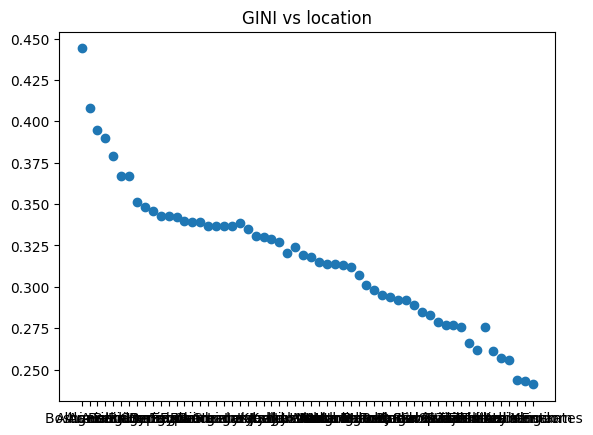

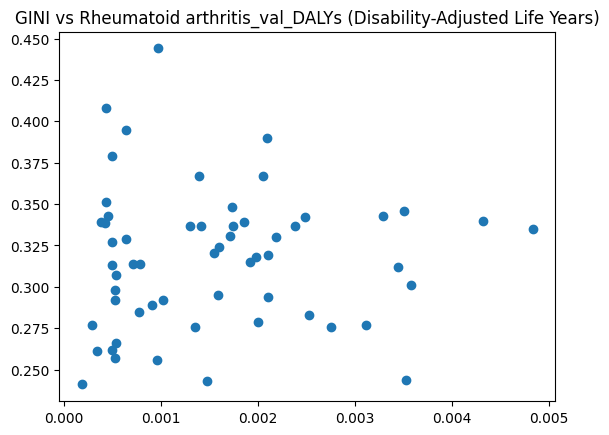

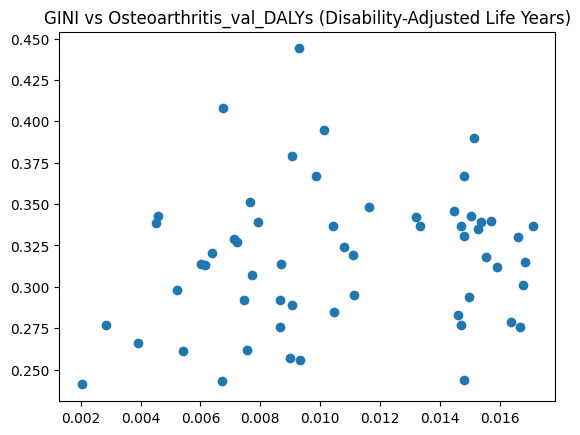

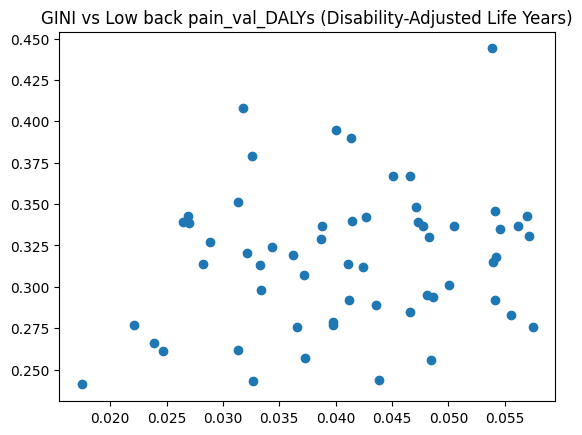

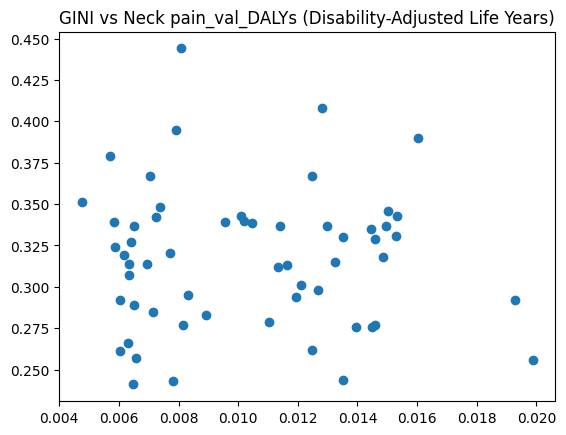

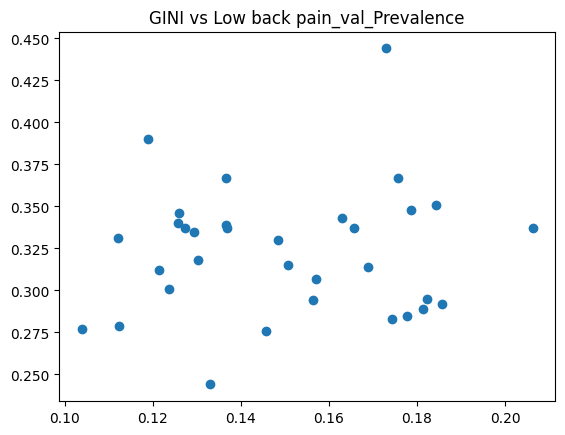

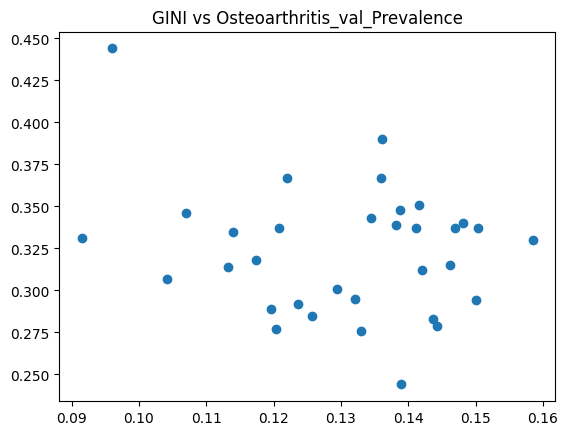

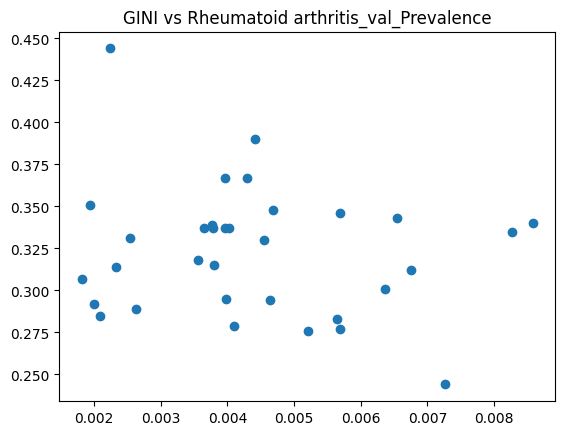

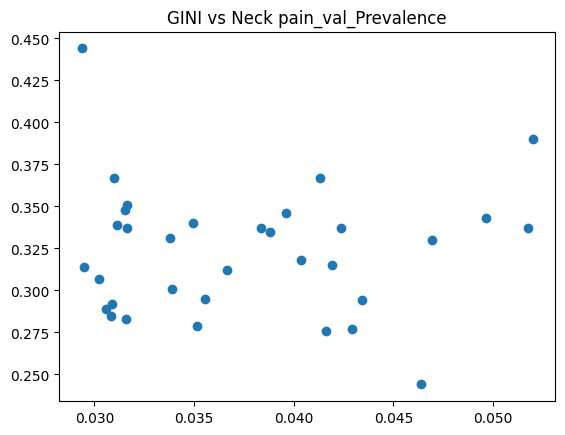

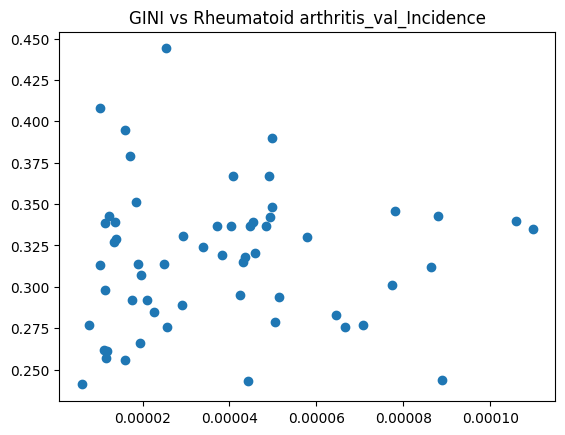

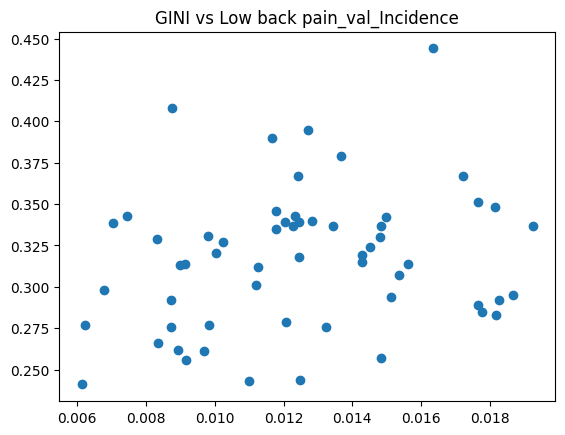

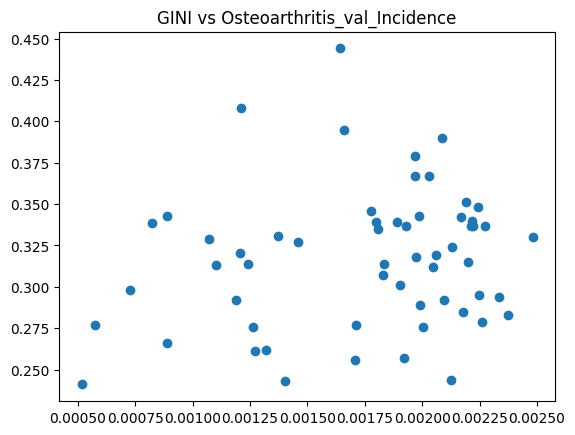

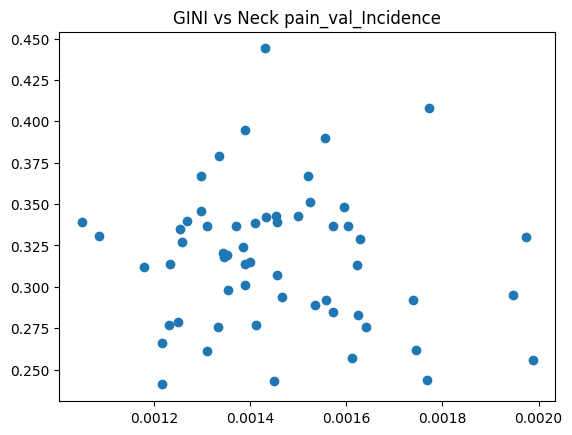

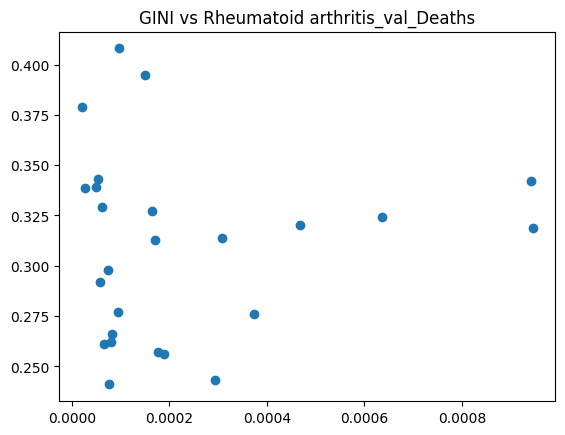

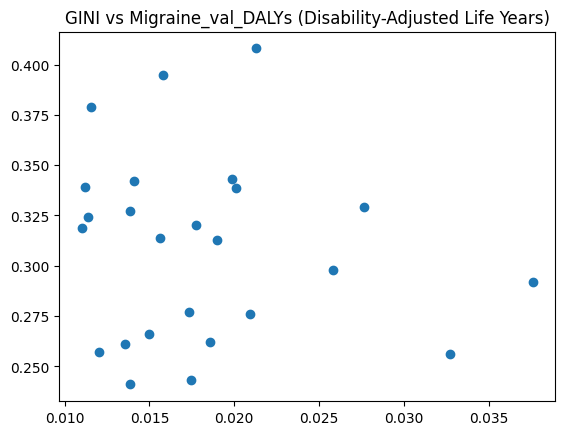

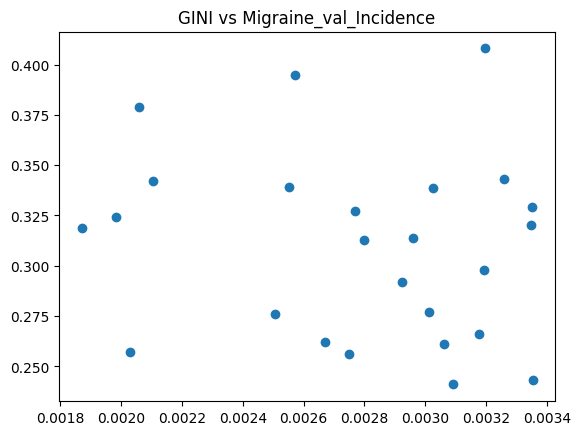

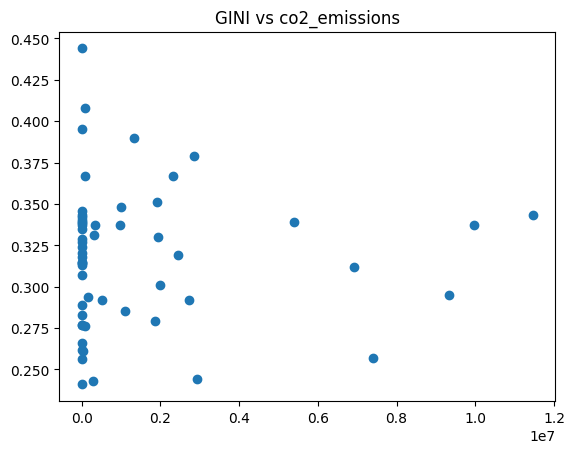

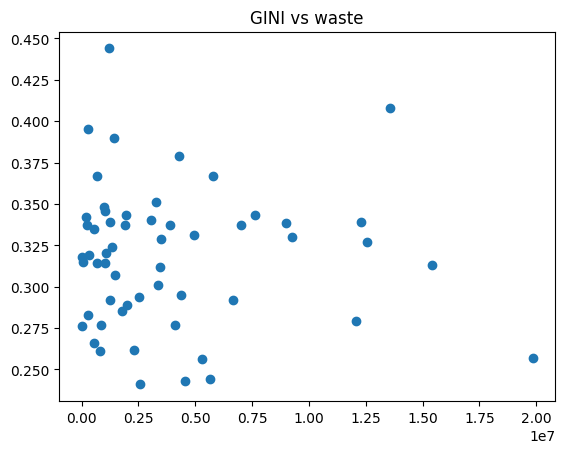

In [142]:
# 
for column in df_diseases_gini_sub.columns:
    xval = df_diseases_gini_sub[column]
    yval = df_gini_sub["gini"]
    plt.scatter(xval, yval)
    plt.title(f"GINI vs {column}")
    plt.show()

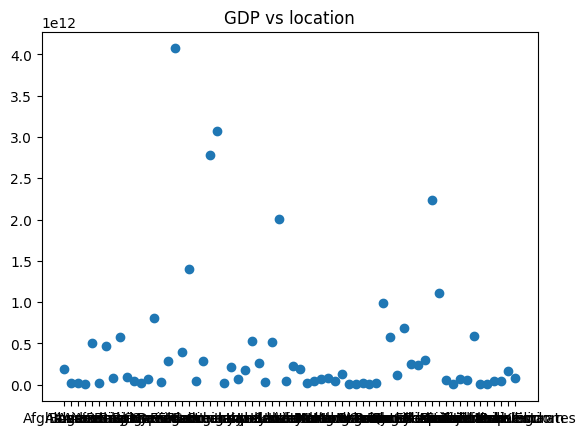

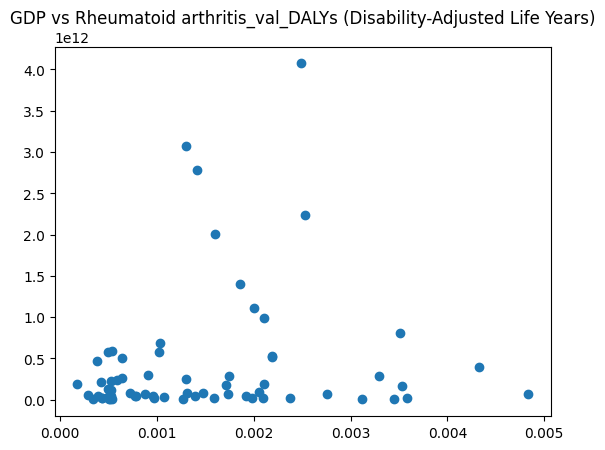

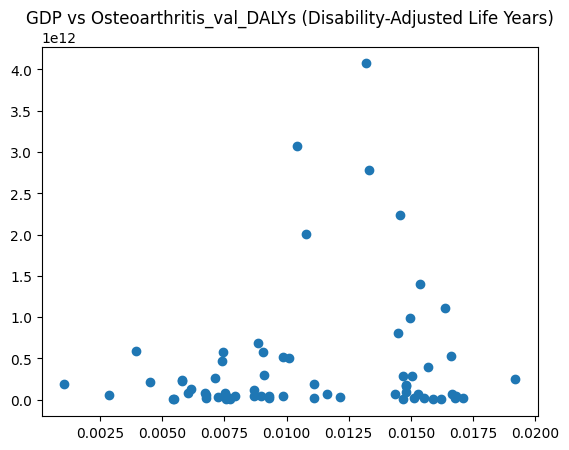

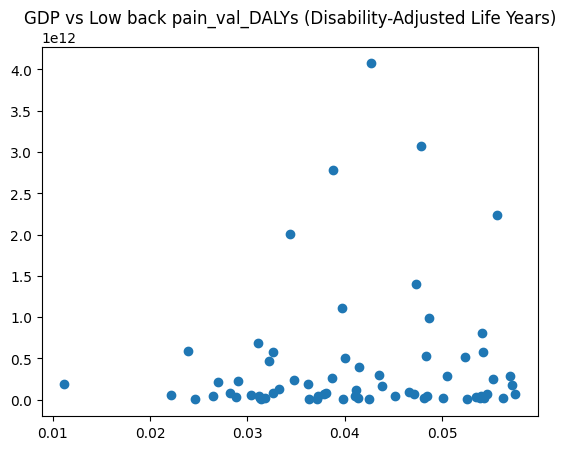

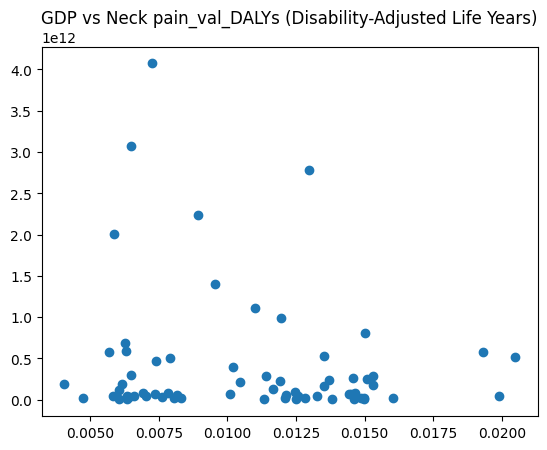

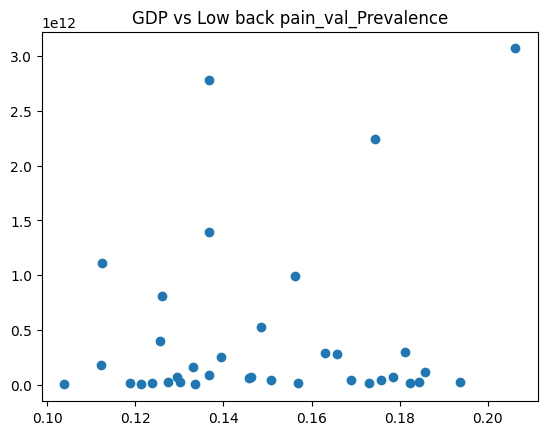

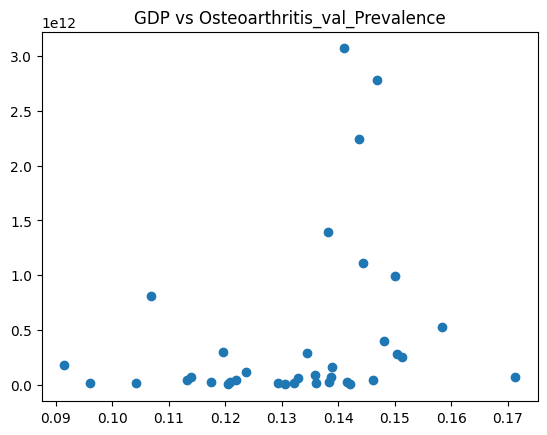

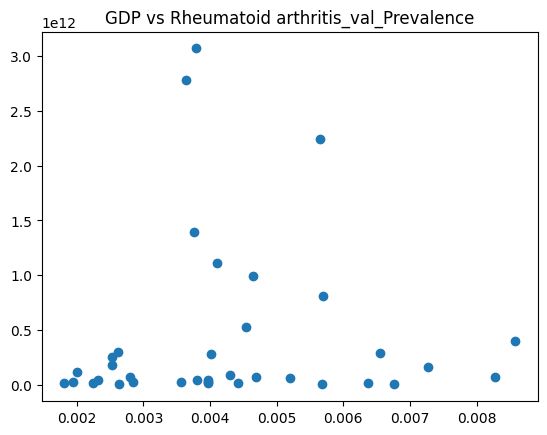

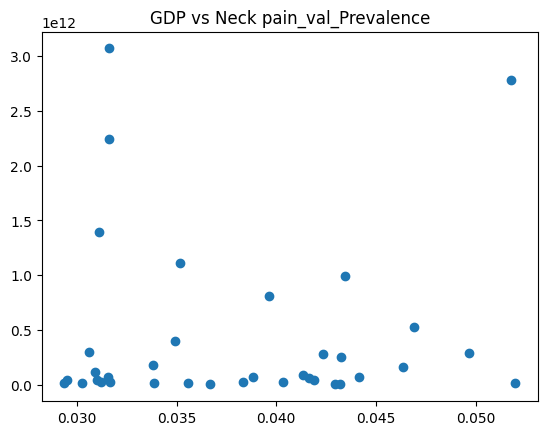

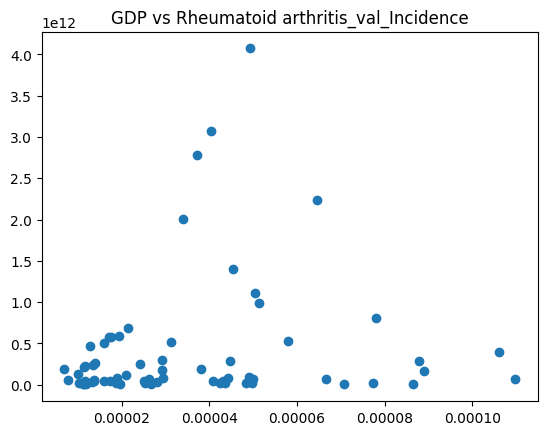

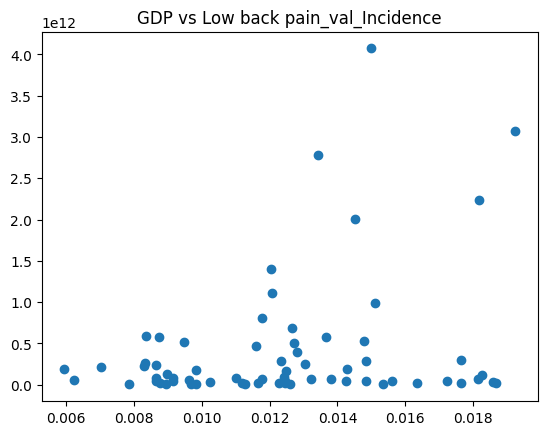

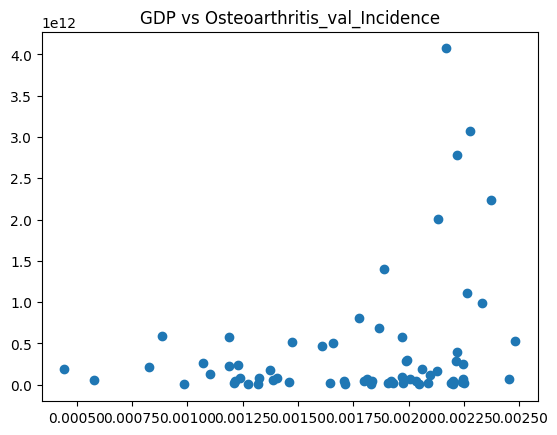

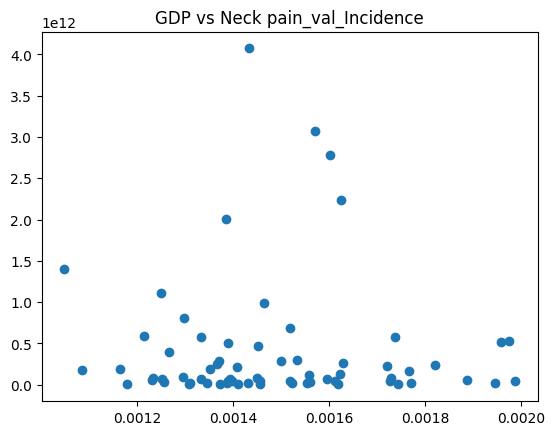

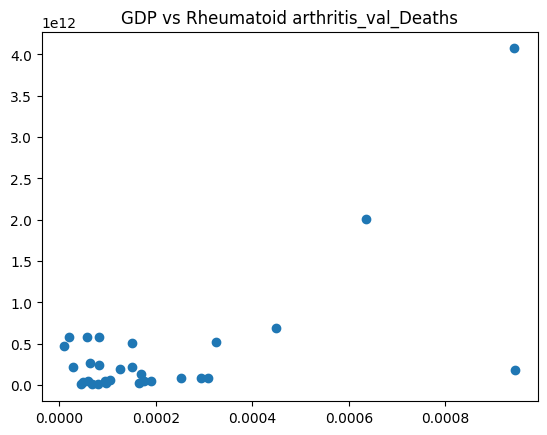

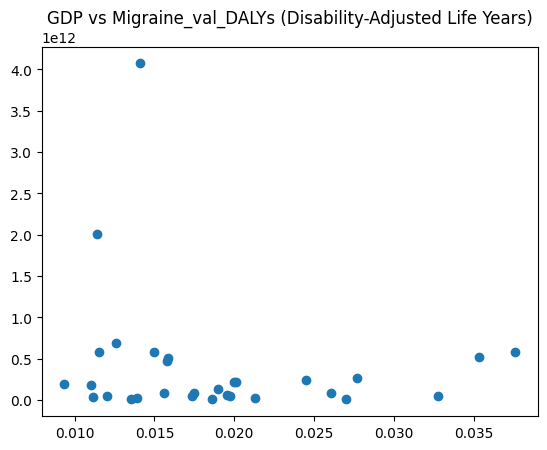

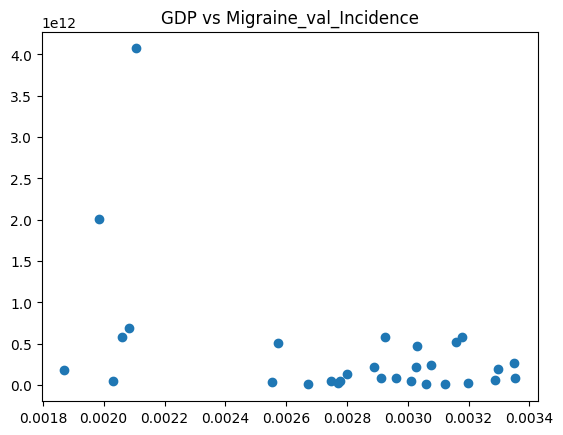

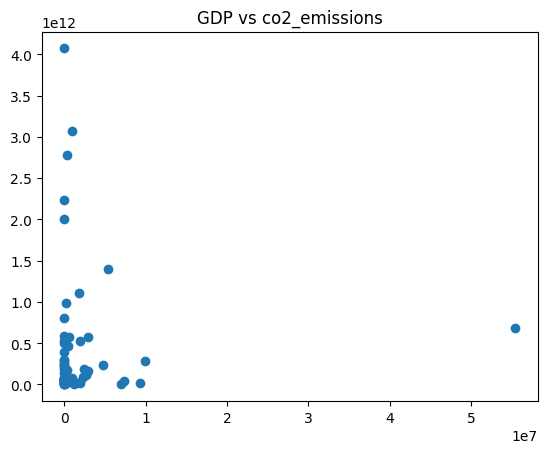

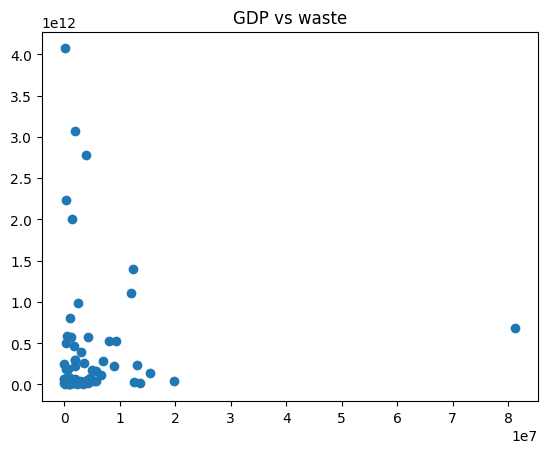

In [145]:
# plot GDP vs. various individuals' pains
for column in df_diseases_gdp_sub.columns:
    xval = df_diseases_gdp_sub[column]
    yval = df_gdp_sub["Last Value"]
    plt.scatter(xval, yval)
    plt.title(f"GDP vs {column}")
    plt.show()

<Figure size 1200x600 with 0 Axes>

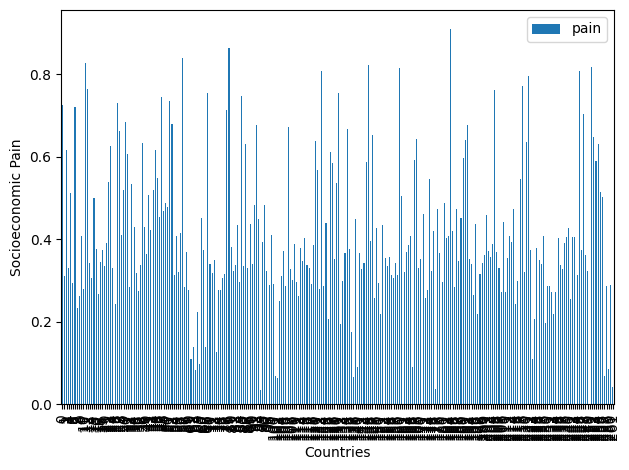

In [ ]:
# Plot socioeconomic pain
plt.figure(figsize=(12, 6))
socioeconomic_df.plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Socioeconomic Pain')
# plt.title('')
plt.tight_layout()
plt.show()

# PLAYGROUND

In [119]:
transform_gdp(pd.read_csv(RES_GDP_PATH, index_col=False), verbose=True)

Max value at     Country  Last Year       Last Value
217   World       2022  100562011134034
                                               Country  Last Year  Last Value
0                                              Algeria       2022    0.437068
1                                                Aruba       2021    0.724464
2                                          Afghanistan       2021    0.616961
3                                               Angola       2022    0.478034
4                                              Albania       2022    0.598927
..                                                 ...        ...         ...
257                                      Middle income       2022    0.067630
258  Middle East & North Africa (excluding high inc...       2022    0.285756
259                                Upper middle income       2022    0.084303
260                           Pre-demographic dividend       2022    0.288501
261                          Post-demographic div

,Country,Last Year,Last Value
0,Algeria,2022,0.437068
1,Aruba,2021,0.724464
2,Afghanistan,2021,0.616961
3,Angola,2022,0.478034
4,Albania,2022,0.598927
...,...,...,...
257,Middle income,2022,0.067630
258,Middle East & North Africa (excluding high inc...,2022,0.285756
259,Upper middle income,2022,0.084303
260,Pre-demographic dividend,2022,0.288501


## Transform GDP to range [0, 1]

In [36]:
# transform gdp data to [0, 1]
gdp_df = pd.read_csv(RES_GDP_PATH)
max_gdp = gdp_df['Last Value'].max()
min_gdp = gdp_df['Last Value'].min()
max_log_value = np.log(max_gdp / min_gdp)

new_gdp = gdp_df['Last Value'].apply(lambda x: x / max_gdp)
new_gdp_log = gdp_df['Last Value'].apply(lambda x: np.log(max_gdp / x) / max_log_value)
print(min_gdp)
print(max_log_value)

60349391
14.326134265032715


<Figure size 2000x600 with 0 Axes>

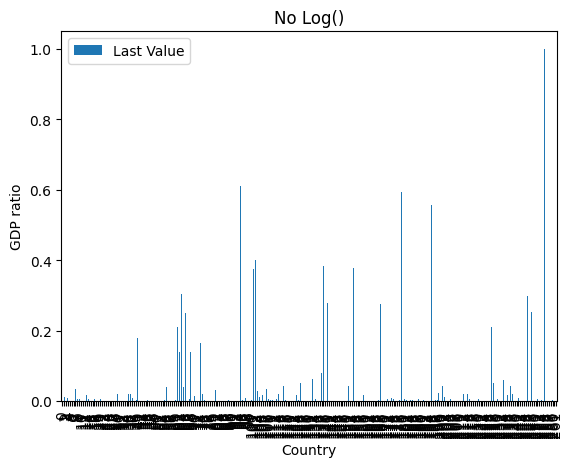

In [37]:
f_new_gdp = pd.DataFrame(new_gdp)
plt.figure(figsize=(20, 6))
df_new_gdp.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('GDP ratio')
plt.title('No Log()')
plt.show()

<Figure size 2000x600 with 0 Axes>

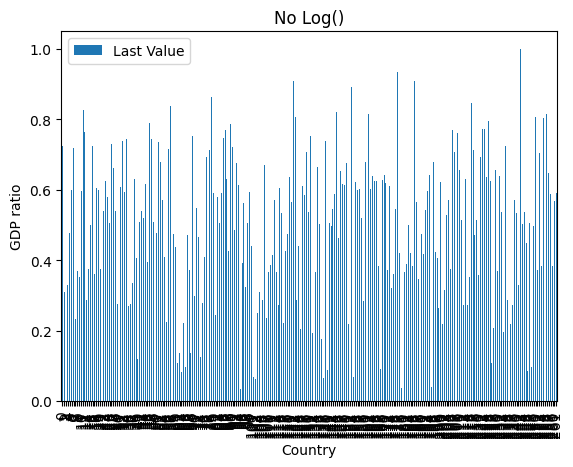

In [35]:
df_new_gdp_log = pd.DataFrame(new_gdp_log)
plt.figure(figsize=(20, 6))
df_new_gdp_log.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('GDP ratio')
plt.title('No Log()')
plt.show()

## extract conflict data

In [155]:
CONFLICT_DATASET_PATH = os.path.join(BASE_PATH, "conflict-deaths-by-country.csv")
df_conflict = pd.read_csv(CONFLICT_DATASET_PATH)

In [ ]:
res_conflict = { }
for _, row in df_conflict.iterrows:
    country = row["location"]
    year = row["year"]
    deaths = row["val"]
    if country in res_conflict:
        # continue